In [1]:
import tensorflow as tf
import os
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import(Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization)

In [2]:
data_dir = 'data'
os.listdir(data_dir)

['test', 'train', 'val']

In [3]:
data_train_path = 'data/train'
data_test_path = 'data/test'
data_val_path = 'data/val'

In [4]:
os.listdir(data_train_path)

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [5]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(180,180),
    batch_size=32
)

Found 380 files belonging to 30 classes.


In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(180, 180),
    batch_size=32,
    validation_split=0.1,
    subset="training",
    seed=123
)

Found 912 files belonging to 30 classes.
Using 821 files for training.


In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(180, 180),
    batch_size=32,
    validation_split=0.1,
    subset="validation",
    seed=123
)

Found 912 files belonging to 30 classes.
Using 91 files for validation.


In [8]:
cat_data = data_train.class_names
cat_data

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

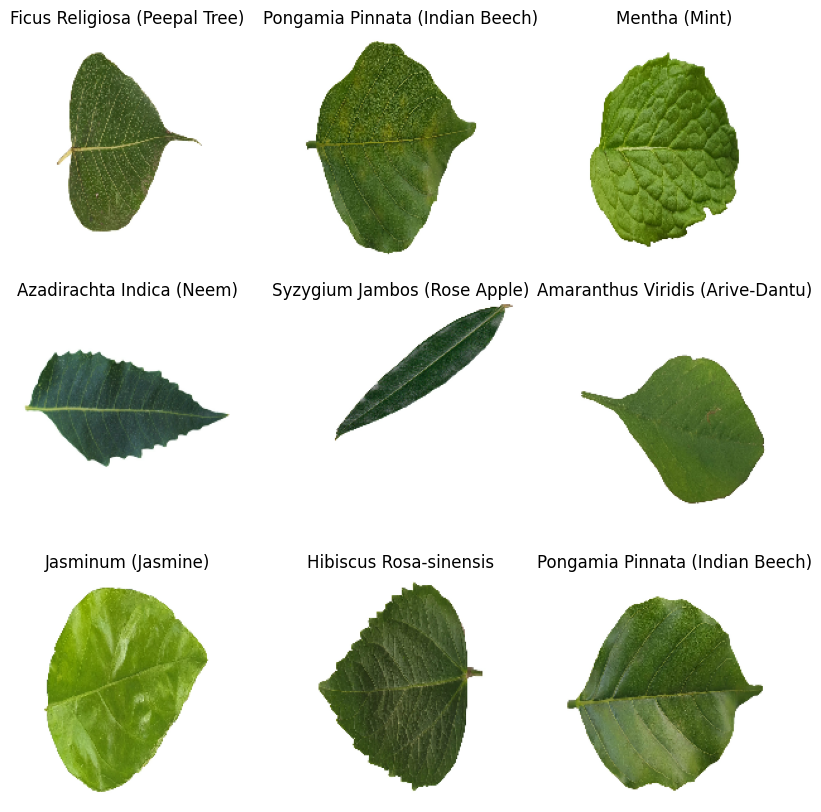

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(cat_data[labels[i]])
        plt.axis('off')

In [10]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape=(180,180,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),

    Dense(units=128, activation='relu'),
    Dense(units=len(cat_data), activation='softmax')


])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,650,846 (25.37 MB)

 Trainable params: 6,650,846 (25.37 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
history = model.fit(data_train,validation_data=data_val,epochs=20)

Epoch 1/20


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.0861 - loss: 93.5051 - val_accuracy: 0.4396 - val_loss: 2.0852
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.6030 - loss: 1.4549 - val_accuracy: 0.6813 - val_loss: 1.1775
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.9116 - loss: 0.3139 - val_accuracy: 0.7363 - val_loss: 1.0233
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.9598 - loss: 0.1610 - val_accuracy: 0.7912 - val_loss: 0.8132
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.9900 - loss: 0.0523 - val_accuracy: 0.7692 - val_loss: 1.0919
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.9831 - loss: 0.0719 - val_accuracy: 0.7802 - val_loss: 1.0257
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.9981 - loss: 0.0169 - val_accuracy: 0.7692 - val_loss: 1.0745
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.9942 - loss: 0.0254 - val_accuracy: 0.7582 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
 Muntingia Calabura (Jamaica Cherry-Gasagase) 
 Accuray =  4.50%


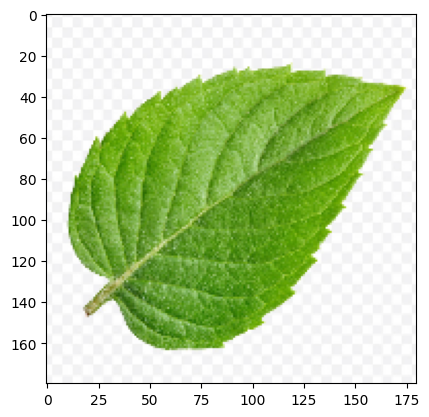

In [14]:
image = 'leaf4.png'
image = tf.keras.utils.load_img(image, target_size=(180,180))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)


predict = model.predict(img_bat)
score = tf.nn.softmax(predict)

plt.imshow(image) 
print(' {} \n Accuray =  {:0.2f}%'.format(cat_data[np.argmax(score)],np.max(score)*100))